In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
def read_data(filename, index=None):
    if not index:
        return pd.read_csv(filename, index_col = index)
    else:
        return pd.read_csv(filename)

In [3]:
df = read_data('Data/data.csv')

In [4]:
df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,NaN,5.000000,0.000000,0.000000,0.000000,NaN
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,NaN,8.000000,0.000000,1.000000,0.000000,NaN
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,NaN,11.000000,0.000000,2.000000,0.000000,NaN
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [51]:
a = pd.DataFrame(df['age'].describe())

In [54]:
median = pd.DataFrame(df.age.mode())

In [55]:
a.append(median)

,age,0
count,150000.000000,NaN
mean,52.295207,NaN
std,14.771866,NaN
min,0.000000,NaN
25%,41.000000,NaN
50%,52.000000,NaN
75%,63.000000,NaN
max,109.000000,NaN
0,NaN,49.0


In [25]:
median

median    52.0
dtype: float64

In [24]:
median = median.rename({0:'median'})

In [26]:
df.corr()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,0.002801,0.002372,0.004403,-0.002721,-0.000571,-0.002906,0.002632,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.005103,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.003571,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,0.004403,-0.115386,-0.005898,1.000000,0.002590,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
zipcode,-0.002721,0.005103,-0.003571,0.002590,1.000000,0.007429,0.001458,0.002070,-0.003609,0.007543,-0.001345,0.007619,-0.003511
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,0.007429,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,0.001458,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,0.002632,-0.019746,0.007124,0.037717,0.002070,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.003609,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.007543,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176


In [30]:
df.shape

(150000, 13)

In [34]:
nm = pd.Series(df.MonthlyIncome.isnull().sum())

In [35]:
nm

0    29731
dtype: int64

In [56]:
age = pd.DataFrame(df.age.describe())

In [57]:
age

,age
count,150000.000000
mean,52.295207
std,14.771866
min,0.000000
25%,41.000000
50%,52.000000
75%,63.000000
max,109.000000


In [58]:
pi = pd.DataFrame(df.PersonID.describe())

In [59]:
pi

,PersonID
count,150000.000000
mean,75000.500000
std,43301.414527
min,1.000000
25%,37500.750000
50%,75000.500000
75%,112500.250000
max,150000.000000


In [62]:
pd.merge([pi,age])

TypeError: merge() missing 1 required positional argument: 'right'

In [27]:
run summary.py

In [28]:
df = read_data('Data/data.csv')

In [17]:
a = cal_summary_stat(df)

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [19]:
a[0]

,0
count,150000
mean,75000.5
std,43301.4
min,1
25%,37500.8
50%,75000.5
75%,112500
max,150000
median,75000.5
0,150000


In [29]:
cal_num_summary(df, 'age')

,0
count,150000.000000
mean,52.295207
std,14.771866
min,0.000000
25%,41.000000
50%,52.000000
75%,63.000000
max,109.000000
median,52.000000
0,49.000000


In [8]:
median = pd.Series(df['age'].median())

In [10]:
summary = df['age'].describe()
median = median.rename({0: 'median'})
summary.append(median)

count     150000.000000
mean          52.295207
std           14.771866
min            0.000000
25%           41.000000
50%           52.000000
75%           63.000000
max          109.000000
median        52.000000
dtype: float64

In [32]:
a = df.describe().transpose()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [33]:
a

,count,mean,std,min,25%,50%,75%,max
PersonID,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
zipcode,150000.0,60648.810013,56.748197,60601.0,60625.000000,60629.000000,60644.000000,60804.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,NaN,NaN,NaN,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0


In [34]:
a.index

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [41]:
for index in a.index:
    a.ix[index, 'missing'] = df[index].isnull().sum() 

In [45]:
a.to_csv('et.csv')

In [57]:
run summary.py

In [58]:
df = read_data('Data/data.csv')

In [52]:
get_summary(df,True)

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,missing value count
PersonID,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0,0.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.0
zipcode,150000.0,60648.810013,56.748197,60601.0,60625.000000,60629.000000,60644.000000,60804.0,0.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,NaN,NaN,NaN,3008750.0,29731.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.0


In [59]:
impute(df, ['MonthlyIncome','NumberOfDependents'])

Filling missing value for MonthlyIncome done.
Filling missing value for NumberOfDependents done.
File saved to output/filled_missing.csv


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.000000
1,2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.000000
2,3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.000000
3,4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.000000
4,5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.000000
5,6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.000000
6,7,0,0.305682,57,60637,0,5710.000000,6670.221237,8,0,3,0,0.000000
7,8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.000000
8,9,0,0.116951,27,60804,0,46.000000,6670.221237,2,0,0,0,0.757222
9,10,0,0.189169,57,60629,0,0.606291,23684.000000,9,0,4,0,2.000000


In [61]:
pd.qcut(df.age,4, [1,2,3,4])

0         2
1         1
2         1
3         1
4         2
5         4
6         3
7         1
8         1
9         3
10        1
11        2
12        2
13        1
14        4
15        4
16        4
17        3
18        2
19        1
20        2
21        1
22        1
23        1
24        3
25        2
26        3
27        4
28        1
29        3
         ..
149970    3
149971    4
149972    2
149973    2
149974    3
149975    3
149976    4
149977    1
149978    2
149979    3
149980    4
149981    2
149982    1
149983    4
149984    4
149985    1
149986    2
149987    1
149988    1
149989    3
149990    2
149991    3
149992    2
149993    1
149994    2
149995    4
149996    2
149997    3
149998    1
149999    4
Name: age, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [75]:
run summary.py

In [76]:
df=read_data('Data/data.csv')

In [77]:
a = discretize(df, 'age')

In [78]:
a

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_discrete
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0,2
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0,1
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0,1
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0,1
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0,2
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0,4
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0,3
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0,1
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN,1
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0,3


In [79]:
a.SeriousDlqin2yr=a.SeriousDlqin2yrs.astype('category')

In [80]:
a

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_discrete
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0,2
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0,1
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0,1
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0,1
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0,2
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0,4
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0,3
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0,1
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN,1
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0,3


In [73]:
pd.get_dummies(a)

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [82]:
a.SeriousDlqin2yrs.dtype

dtype('int64')

In [1]:
run summary.py

In [3]:
df = read_data('data/data.csv')

In [4]:
df

,person_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
get_summary(df)

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Descriptive statistics file saved to output/summary.csv
Correlation statistics file saved to output/correlation.csv
Graph saved as person_id.png
Graph saved as serious_dlqin2yrs.png
Graph saved as revolving_utilization_of_unsecured_lines.png
Graph saved as age.png
Graph saved as zipcode.png
Graph saved as number_of_time30-59_days_past_due_not_worse.png
Graph saved as debt_ratio.png
Graph saved as monthly_income.png
Graph saved as number_of_open_credit_lines_and_loans.png
Graph saved as number_of_times90_days_late.png
Graph saved as number_real_estate_loans_or_lines.png
Graph saved as number_of_time60-89_days_past_due_not_worse.png
Graph saved as number_of_dependents.png


,count,mean,std,min,25%,50%,75%,max,missing value count
person_id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0,0.0
serious_dlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.0
revolving_utilization_of_unsecured_lines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.0
zipcode,150000.0,60648.810013,56.748197,60601.0,60625.000000,60629.000000,60644.000000,60804.0,0.0
number_of_time30-59_days_past_due_not_worse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.0
debt_ratio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.0
monthly_income,120269.0,6670.221237,14384.674215,0.0,NaN,NaN,NaN,3008750.0,29731.0
number_of_open_credit_lines_and_loans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.0
number_of_times90_days_late,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.0


In [8]:
df = impute(df, ['monthly_income'])
df = impute(df, ['number_of_dependents'], 'zero')

Filling missing value for monthly_income done.
File saved to output/filled_missing.csv
Filling missing value for number_of_dependents done.
File saved to output/filled_missing.csv


In [9]:
df

,person_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,6670.221237,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,6670.221237,2,0,0,0,0.0
9,10,0,0.189169,57,60629,0,0.606291,23684.000000,9,0,4,0,2.0


In [10]:
df = discretize(df, 'age', bin_size=5, boundaries=(20,80))

Column age is discretized in to 14 buckets


In [11]:
df

,person_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_bucket
0,1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.0,"(40, 45]"
1,2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.0,"(35, 40]"
2,3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.0,"(35, 40]"
3,4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.0,"(25, 30]"
4,5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.0,"(45, 50]"
5,6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.0,"(70, 75]"
6,7,0,0.305682,57,60637,0,5710.000000,6670.221237,8,0,3,0,0.0,"(55, 60]"
7,8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.0,"(35, 40]"
8,9,0,0.116951,27,60804,0,46.000000,6670.221237,2,0,0,0,0.0,"(25, 30]"
9,10,0,0.189169,57,60629,0,0.606291,23684.000000,9,0,4,0,2.0,"(55, 60]"


In [12]:
pd.value_counts(df['age_bucket'])

(45, 50]     18829
(50, 55]     17861
(55, 60]     16945
(60, 65]     16461
(40, 45]     16208
(35, 40]     13611
(65, 70]     10963
(30, 35]     10728
(25, 30]      7730
(70, 75]      7507
(75, 80]      5193
(80, 109]     4936
(20, 25]      3027
[0, 20]          1
Name: age_bucket, dtype: int64

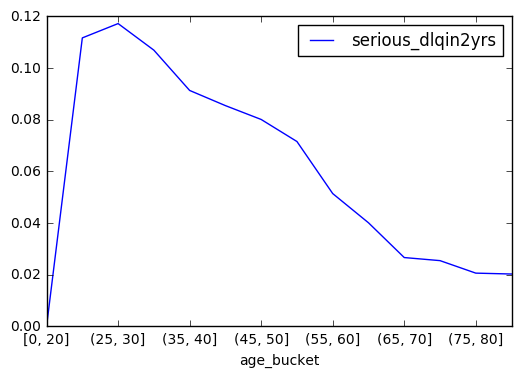

In [14]:
%matplotlib inline
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

In [17]:
features = np.array(['revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse',
            'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 'number_of_times90_days_late',
            'number_real_estate_loans_or_lines','number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])
y='serious_dlqin2yrs'

In [16]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
train_X, test_X, train_y, test_y = train_test_split(df[features], df[y], test_size=0.25)

In [20]:
clf = LogisticRegression()
clf.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
clf.score(test_X, test_y)

0.93437333333333328

In [28]:
clf.sparsify()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
b=  pd.DataFrame(clf.coef_.transpose())

PandasError: DataFrame constructor not properly called!

In [49]:
run classifier.py

In [50]:
evaluate_clf(df, features,y)

In [52]:
predict(df.ix[:1000,:],df.ix[5000:10000,:], features, y)

/Users/Ran/Desktop/Github/Machine-Learning-for-Public-Policy/PA2/classifier.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  y_pred = clf.predict(df_pred[X])


,person_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_bucket
5000,5001,0,0.105212,57,60657,0,2270.000000,6670.221237,5,0,1,0,0.0,"(55, 60]"
5001,5002,0,0.902261,41,60804,0,0.629763,5825.000000,11,0,4,0,0.0,"(40, 45]"
5002,5003,0,0.634157,55,60625,0,0.180896,12918.000000,16,0,0,0,0.0,"(50, 55]"
5003,5004,0,0.010343,52,60804,0,2874.000000,6670.221237,16,0,2,0,0.0,"(50, 55]"
5004,5005,0,1.000000,47,60637,0,0.000000,6670.221237,4,0,0,0,0.0,"(45, 50]"
5005,5006,0,0.000554,85,60804,0,0.000095,10500.000000,12,0,0,0,0.0,"(80, 109]"
5006,5007,0,0.015355,54,60625,0,0.373268,5700.000000,10,0,2,0,0.0,"(50, 55]"
5007,5008,0,0.301556,44,60644,0,0.639739,14086.000000,11,0,4,0,1.0,"(40, 45]"
5008,5009,0,0.993801,29,60804,2,0.296686,1900.000000,7,0,0,0,0.0,"(25, 30]"
5009,5010,0,0.000000,77,60618,0,0.034754,57000.000000,16,0,1,0,0.0,"(75, 80]"


In [1]:
run summary.py

In [33]:
df = read_data('data/cs.csv')

In [30]:
run preprocess.py

In [34]:
df = discretize(df, 'age', bin_size=5, boundaries=(20,70))

Column age is discretized in to 12 buckets


In [35]:
df = cat_to_dummy(df,'age_bucket')

In [39]:
df[df['nan'] == 1]

KeyError: 'nan'